In [8]:
%pylab inline
from __future__ import division
from itertools import permutations, combinations
import copy as cp

Populating the interactive namespace from numpy and matplotlib


In [9]:
#Determine the size of the board

input_text = raw_input('How big is your chess board?')
N = int(input_text)
x = range(1, N + 1)


master_list = []
for item in permutations(range(1, N + 1)):
    y = item
    new_list = []
    for x_value, y_value in zip(x, y):
        new_list.append((x_value, y_value))
    master_list.append(new_list)


def IsDiagonal(point1, point2):
    x1 = point1[0]
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1]
    gradient = (y2 - y1) / (x2 - x1)
    if gradient == -1 or gradient == 1:
        return(True)
    else:
        return(False)


solutions = []
for possible_solution in master_list:
    diagonal_clash_list = []
    for piece1, piece2 in combinations(possible_solution, 2):
        diagonal_clash_list.append(IsDiagonal(piece1, piece2))

    if True not in diagonal_clash_list:
        solutions.append(possible_solution)

solutions = [set(solution) for solution in solutions]

solutions

How big is your chess board?8


[{(1, 1), (2, 5), (3, 8), (4, 6), (5, 3), (6, 7), (7, 2), (8, 4)},
 {(1, 1), (2, 6), (3, 8), (4, 3), (5, 7), (6, 4), (7, 2), (8, 5)},
 {(1, 1), (2, 7), (3, 4), (4, 6), (5, 8), (6, 2), (7, 5), (8, 3)},
 {(1, 1), (2, 7), (3, 5), (4, 8), (5, 2), (6, 4), (7, 6), (8, 3)},
 {(1, 2), (2, 4), (3, 6), (4, 8), (5, 3), (6, 1), (7, 7), (8, 5)},
 {(1, 2), (2, 5), (3, 7), (4, 1), (5, 3), (6, 8), (7, 6), (8, 4)},
 {(1, 2), (2, 5), (3, 7), (4, 4), (5, 1), (6, 8), (7, 6), (8, 3)},
 {(1, 2), (2, 6), (3, 1), (4, 7), (5, 4), (6, 8), (7, 3), (8, 5)},
 {(1, 2), (2, 6), (3, 8), (4, 3), (5, 1), (6, 4), (7, 7), (8, 5)},
 {(1, 2), (2, 7), (3, 3), (4, 6), (5, 8), (6, 5), (7, 1), (8, 4)},
 {(1, 2), (2, 7), (3, 5), (4, 8), (5, 1), (6, 4), (7, 6), (8, 3)},
 {(1, 2), (2, 8), (3, 6), (4, 1), (5, 3), (6, 5), (7, 7), (8, 4)},
 {(1, 3), (2, 1), (3, 7), (4, 5), (5, 8), (6, 2), (7, 4), (8, 6)},
 {(1, 3), (2, 5), (3, 2), (4, 8), (5, 1), (6, 7), (7, 4), (8, 6)},
 {(1, 3), (2, 5), (3, 2), (4, 8), (5, 6), (6, 4), (7, 7), (8, 

In [10]:
# Remove symmetry elements

# Define C4 rotation
def c4(points):
    transformed_points = []
    for point in points:
        x, y = point
        transformed_points.append(((N + 1) - y, x))
    return(set(transformed_points))


# Define y=x mirror plane
def mirror(points):
    transformed_points = []
    for point in points:
        x, y = point
        transformed_points.append((y, x))
    return(set(transformed_points))


# Define solutions that are equivalent
def symmetry_equivalent_solutions(solution):
    equivalent_solutions = []
    equivalent_solutions.append(solution)
    equivalent_solutions.append(mirror(solution))
    equivalent_solutions.append(c4(solution))
    equivalent_solutions.append(mirror(c4(solution)))
    equivalent_solutions.append(c4(c4(solution)))
    equivalent_solutions.append(mirror(c4(c4(solution))))
    equivalent_solutions.append(c4(c4(c4(solution))))
    equivalent_solutions.append(mirror(c4(c4(c4(solution)))))
    return(equivalent_solutions)


#remove symmetry equivalent duplicates
unique_solutions = cp.deepcopy(solutions)
for n, solution in enumerate(solutions):
    found_in_solutions = False
    for related_solution in symmetry_equivalent_solutions(solution):
        if related_solution in solutions[n + 1:]:
            found_in_solutions = True
            break
    if found_in_solutions:
        unique_solutions.remove(solution)

unique_solutions

[{(1, 6), (2, 3), (3, 7), (4, 4), (5, 1), (6, 8), (7, 2), (8, 5)},
 {(1, 6), (2, 4), (3, 1), (4, 5), (5, 8), (6, 2), (7, 7), (8, 3)},
 {(1, 6), (2, 4), (3, 7), (4, 1), (5, 8), (6, 2), (7, 5), (8, 3)},
 {(1, 7), (2, 2), (3, 4), (4, 1), (5, 8), (6, 5), (7, 3), (8, 6)},
 {(1, 7), (2, 2), (3, 6), (4, 3), (5, 1), (6, 4), (7, 8), (8, 5)},
 {(1, 7), (2, 3), (3, 1), (4, 6), (5, 8), (6, 5), (7, 2), (8, 4)},
 {(1, 7), (2, 3), (3, 8), (4, 2), (5, 5), (6, 1), (7, 6), (8, 4)},
 {(1, 7), (2, 4), (3, 2), (4, 5), (5, 8), (6, 1), (7, 3), (8, 6)},
 {(1, 7), (2, 4), (3, 2), (4, 8), (5, 6), (6, 1), (7, 3), (8, 5)},
 {(1, 7), (2, 5), (3, 3), (4, 1), (5, 6), (6, 8), (7, 2), (8, 4)},
 {(1, 8), (2, 3), (3, 1), (4, 6), (5, 2), (6, 5), (7, 7), (8, 4)},
 {(1, 8), (2, 4), (3, 1), (4, 3), (5, 6), (6, 2), (7, 7), (8, 5)}]

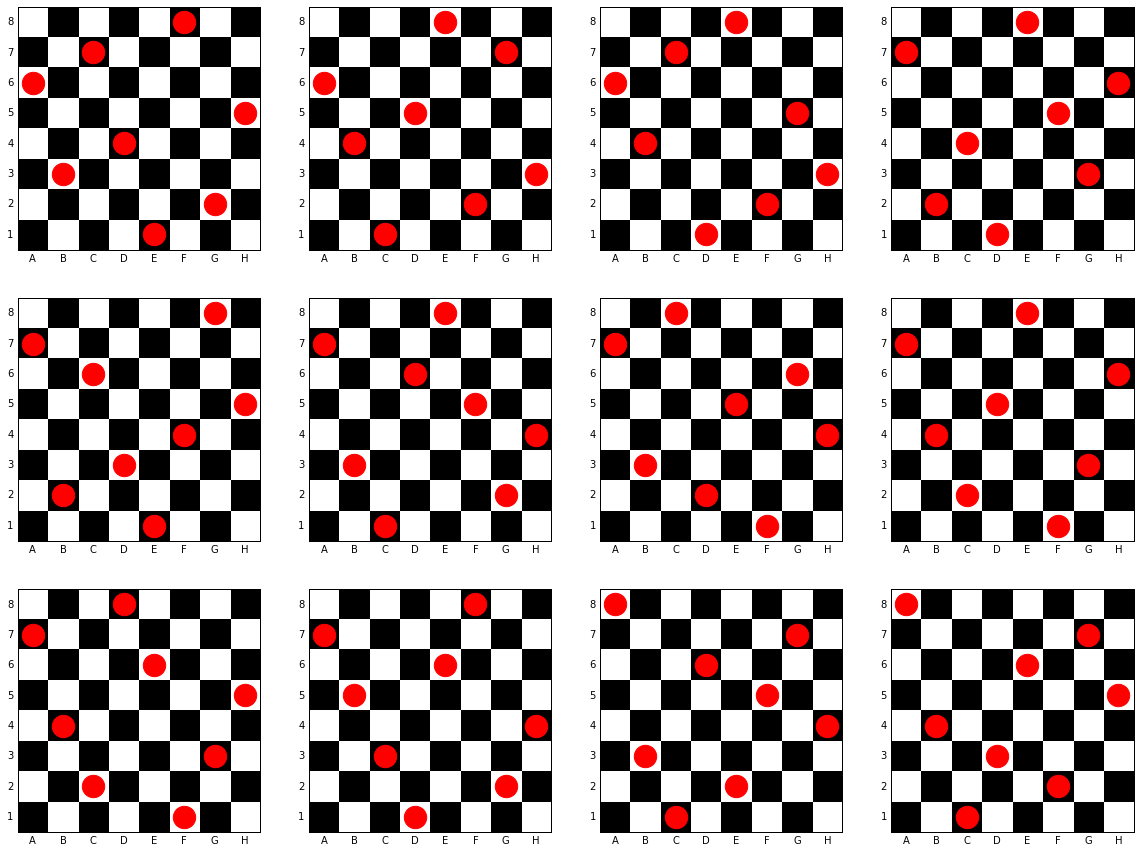

In [11]:
# Display solutions

def plot_solution(points, savefile_name=None):
    Z1 = np.zeros(N * N).reshape(N, N)
    for r, x in enumerate(Z1):
        for c, y in enumerate(x):
            if (r + c) % 2 == 0:
                Z1[r, c] = 1
    plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
               extent=(0.5, N + 0.5, 0.5, N + 0.5))

    row_labels = range(1, N + 1)
    col_labels = [letter for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"][:N]
    plt.xticks(range(1, N + 1), col_labels)
    plt.yticks(range(1, N + 1), row_labels)
    plt.xlim(0.5, N + 0.5)
    plt.ylim(0.5, N + 0.5)
    ax = plt.gca()
    for line in ax.xaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.yaxis.get_ticklines():
        line.set_visible(False)
    #plt.show()
    for point in points:
        plt.scatter(*point, color='r', s=500)
    if savefile_name:
        plt.savefig(savefile_name)
    #return(plt.gcf())
    
def plot_solutions(list_of_solutions):
    plt.gcf().set_size_inches(20,20)
    for n, solution in enumerate(list_of_solutions):
        plt.subplot(4,4,n+1)
        plot_solution(solution)
        

plot_solutions(unique_solutions)